In [5]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


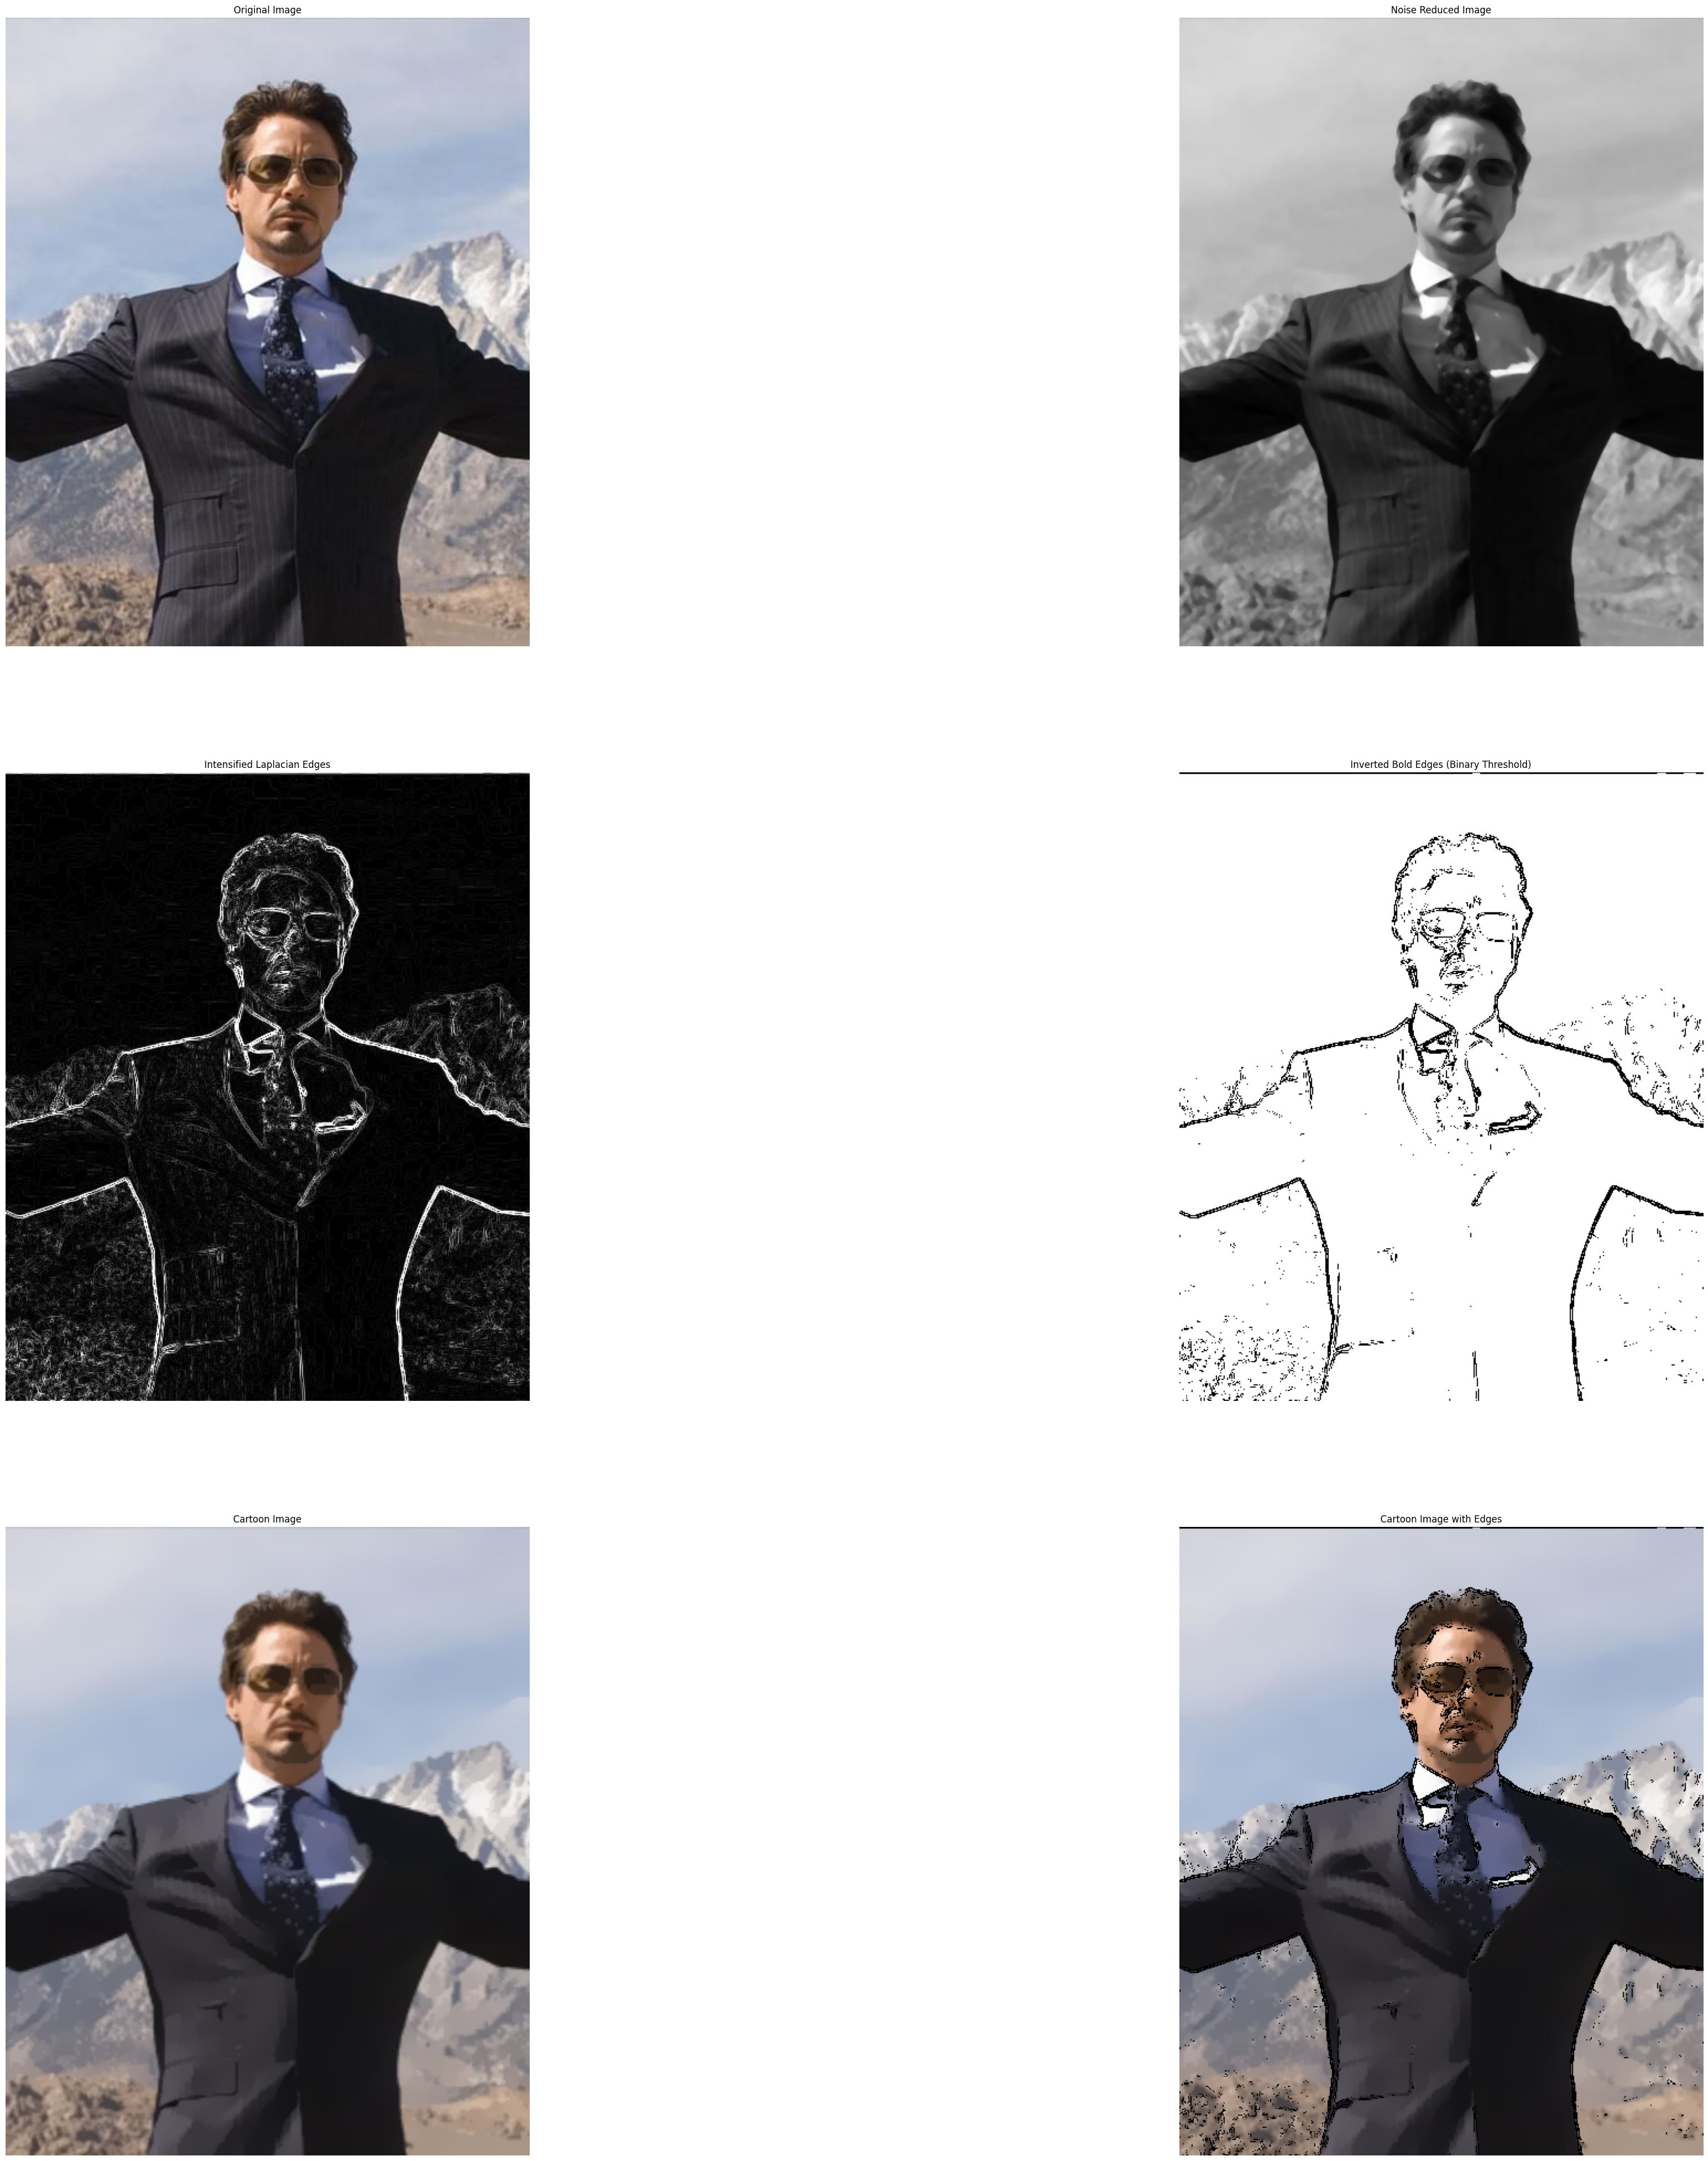

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/CVTests/image2.jpg"
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load the image.")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Median filter (5×5 kernel) for noise reduction
    noise_reduced_image = cv2.medianBlur(gray_image, 5)

    # Apply Laplacian edge detection
    # CV_8U cannot save negative values so 64 bit
    # increase intensity of edges by 2
    laplacian_edges = cv2.Laplacian(noise_reduced_image, cv2.CV_64F, ksize=3, scale=2)

    # converted to an absolute scale to be displayed.
    laplacian_edges = cv2.convertScaleAbs(laplacian_edges)

    # Apply binary threshold
    # Pixels above the threshold will be set to 255 (white),and below to 0 (black).
    _, bold_edges = cv2.threshold(laplacian_edges, 100, 255, cv2.THRESH_BINARY)

    # Invert the colors of edges to get black edges
    inverted_bold_edges = cv2.bitwise_not(bold_edges)

    # Downsample the image to a lower resolution for faster processing
    # The image is resized to half its original width and height.
    small_img = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)

    # Apply small bilateral filters iteratively for smoothing
    for _ in range(5):
        small_img = cv2.bilateralFilter(small_img, d=9, sigmaColor=10, sigmaSpace=5)

    # Resize back to the original resolution
    # Resizes to the original width and height.
    cartoon_img = cv2.resize(small_img, (image.shape[1], image.shape[0]))

    # Convert the inverted bold edges to a 3-channel image to overlay with the cartoon image
    edges_colored = cv2.cvtColor(inverted_bold_edges, cv2.COLOR_GRAY2BGR)

    # Combine the cartoon image with the edges using a bitwise AND to overlay the edges
    cartoon_with_edges = cv2.bitwise_and(cartoon_img, edges_colored)

    # Display the images
    plt.figure(figsize=(50, 50))

    # Original image
    plt.subplot(3, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Noise reduced grayscale image
    plt.subplot(3, 2, 2)
    plt.imshow(noise_reduced_image, cmap='gray')
    plt.title('Noise Reduced Image')
    plt.axis('off')

    # Laplacian edges with increased intensity
    plt.subplot(3, 2, 3)
    plt.imshow(laplacian_edges, cmap='gray')
    plt.title('Intensified Laplacian Edges')
    plt.axis('off')

    # Inverted bold edges after binary thresholding
    plt.subplot(3, 2, 4)
    plt.imshow(inverted_bold_edges, cmap='gray')
    plt.title('Inverted Bold Edges (Binary Threshold)')
    plt.axis('off')

    # Cartoon-styled image without edges
    plt.subplot(3, 2, 5)
    plt.imshow(cv2.cvtColor(cartoon_img, cv2.COLOR_BGR2RGB))
    plt.title('Cartoon Image')
    plt.axis('off')

    # Cartoon-styled image with edges
    plt.subplot(3, 2, 6)
    plt.imshow(cv2.cvtColor(cartoon_with_edges, cv2.COLOR_BGR2RGB))
    plt.title('Cartoon Image with Edges')
    plt.axis('off')

    plt.show()
